In [2]:
import pandas as pd

from because.probability import prob

from because.synth import read_data
from because.visualization import viz

r = read_data.Reader('/home/arun/HPCC-covid19/LLCP/llcpA.csv')
ds = r.read()

ps = prob.ProbSpace(ds)

hbe:  0.9490824254306831
getData:  290759 records read.


# Questions

1. **What are all the factors that influence the likelihood of a person having diabetes?**

2. **The effect of type of employment on Diabetes**

Interesting variables: Diabetes, Age, Weight, Height, BMI, Income, Employment, Physical Activity

# Step 1: Single Variable Distribution

Viz.show: Target =  [('diabetes',), ('age',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['diabetes', 'age']


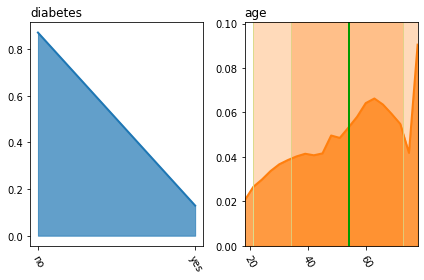

Viz.show: Target =  [('height',), ('weight',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['height', 'weight']


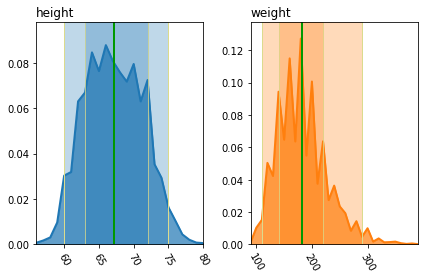

Viz.show: Target =  [('bmi',), ('income',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['bmi', 'income']


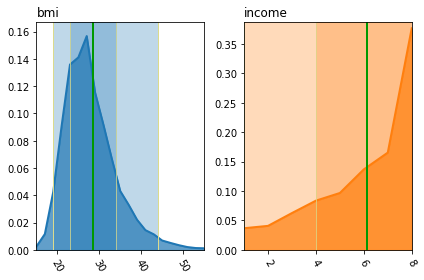

Viz.show: Target =  [('employment',), ('physicalactivity',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['employment', 'physicalactivity']


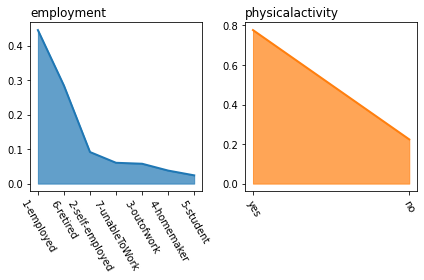

In [15]:
viz.show(probspace=ps, targetSpec=[('diabetes'),('age')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('height'),('weight')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('bmi'), ('income')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('employment'), ('physicalactivity')], condSpec=[], gtype='multi')


In [180]:
varlist1 = ['diabetes', 'income', 'employment', 'physicalactivity', 'bmicat']

for i in varlist1:
    tempVals = ps.getValues(i)
    for j in tempVals:
        print('{:<18} {:<22} {:<5}'.format(i, j, round(ps.P([(i, j)]), 2)))

diabetes           no                     0.87 
diabetes           yes                    0.13 
income             1.0                    0.04 
income             2.0                    0.04 
income             3.0                    0.06 
income             4.0                    0.08 
income             5.0                    0.1  
income             6.0                    0.14 
income             7.0                    0.17 
income             8.0                    0.38 
employment         1-employed             0.44 
employment         2-self-employed        0.09 
employment         3-outofwork            0.06 
employment         4-homemaker            0.04 
employment         5-student              0.02 
employment         6-retired              0.28 
employment         7-unableToWork         0.06 
physicalactivity   no                     0.22 
physicalactivity   yes                    0.78 
bmicat             1-underweight          0.01 
bmicat             2-normal             

In [56]:
goodVars = ['diabetes', 'age', 'height', 'weight', 'bmi', 'bmicat', 'income', 'employment', 'physicalactivity']

for i in goodVars:
    print("Expected Values of", i, "=", ps.E([i]))

Expected Values of diabetes = no
Expected Values of age = 54.1436825687253
Expected Values of height = 67.17940631244433
Expected Values of weight = 183.06693859863324
Expected Values of bmi = 28.401521535016972
Expected Values of bmicat = 3-overweight
Expected Values of income = 6.119253402302251
Expected Values of employment = 1-employed
Expected Values of physicalactivity = yes


### Observations : 

From the survey, 

* most of the people have no diabetes (around 87%)

* Most of the people are in the age between 55 and above (around 53%) in ageGroup (5,6)

* 1/3rd of surveyed people are overweight in nature. (around 36%)

* Most of the people in participated in survey are employed (around 44%)

* 37% of the surveyed people have income over 75000 per annum. (around 38%)


# Step 2: Pairwise relationship of variables with Diabetes

In [344]:
condList = ['age', 'height', 'weight', 'bmi', 'bmicat', 'income', 'employment', 'physicalactivity']
varlist1 = ['diabetes', 'income', 'employment', 'physicalactivity', 'ageGroup', 'bmicat']

print(f"condVar,\tj,\t P(diabetes = yes | condVar=j), P(diabetes = yes), diff(conditioned - orignial)")
print()

db_yes = round(ps.P([('diabetes', 'yes')]), 2)

for i in condList:
    # print("Expected Values of", i, "=", ps.E(['diabetes'], ['age']))
    if i in varlist1:
        for j in ps.getValues(i):
            tempProb = round(ps.P([('diabetes', 'yes')], [(i, j)], power=1), 2)
            print('{:<18}  {:<18}  {:>8}  {:>8}  {:>12}'.format(i, j, tempProb, db_yes, round(tempProb-db_yes, 2)))
    else:
        tempProb = round(ps.P([('diabetes', 'yes')], [i], power=1), 2)
        print('{:<39} {:>8}  {:>8}  {:>12}'.format(i, tempProb, db_yes, round(tempProb-db_yes, 2)))

condVar,	j,	 P(diabetes = yes | condVar=j), P(diabetes = yes), diff(conditioned - orignial)

age                                          0.1      0.13         -0.03
height                                      0.12      0.13         -0.01
weight                                      0.15      0.13          0.02
bmi                                         0.11      0.13         -0.02
bmicat              1-underweight           0.05      0.13         -0.08
bmicat              2-normal                0.06      0.13         -0.07
bmicat              3-overweight            0.11      0.13         -0.02
bmicat              4-obese                 0.19      0.13          0.06
bmicat              5-extremely obese       0.29      0.13          0.16
income              1.0                      0.2      0.13          0.07
income              2.0                     0.23      0.13           0.1
income              3.0                      0.2      0.13          0.07
income              4.0        

### Observations :

1. As the income increased, the effect of conditioning the income on diabetes decreased.

2. Students have lesser prone to diabetes, while the retired people and those who are unable to work are having higher chances of diabetes.

3. People who are doing physical activity are 3% lesser chance of diabetes, while those who are not doing any physical activity are 9% more prone to diabetes.

4. 22% of the people without physical activities are having diabetes.

## Diabetes vs Age

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('age',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


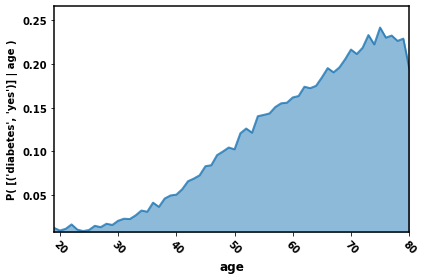

P(diabetes = yes) =                                0.12910348432894597
P(diabetes = no) =                                 0.8708965156710541
P(diabetes = yes | age) =                          0.10371819960861056
P(diabetes = no | age) =                           0.8962818003913894
P(diabetes = yes | age) - P(diabetes = yes) =     -0.02538528472033541


In [220]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['age'], gtype='pdf')

dby = ps.P([('diabetes', 'yes')])
dbn = ps.P([('diabetes', 'no')])
dby_age = ps.P([('diabetes', 'yes')], ['age'])
dbn_age = ps.P([('diabetes', 'no')], ['age'])

print("P(diabetes = yes) = {:>50}".format(dby))
print("P(diabetes = no) = {:>50}".format(dbn))
print("P(diabetes = yes | age) = {:>44}".format(dby_age))
print("P(diabetes = no | age) = {:>44}".format(dbn_age))
print("P(diabetes = yes | age) - P(diabetes = yes) = {:>24}".format(dby_age - dby))

### Observations : 

* Diabetes and Age are positively correlated.

* Probability of diabetes increases with the age. 

* Conditioned on Age, the probability of diabetes decreased by 2.5%

## Diabetes vs Weight

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('weight',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


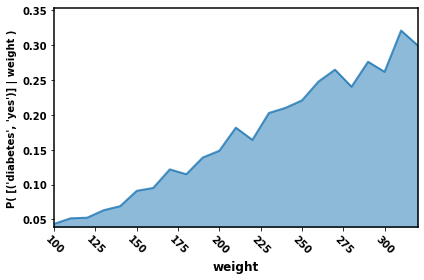

P(diabetes = yes) =                                0.12910348432894597
P(diabetes = yes | weight) =                       0.1505452105351451
P(diabetes = yes | weight) - P(diabetes = yes) =   0.021441726206199135


In [225]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['weight'], gtype='pdf')

target = ('diabetes','yes')

dby = ps.P(target)

dby_weight = ps.P(target, ['weight'])

print("P(diabetes = yes) = {:>50}".format(dby))
print("P(diabetes = yes | weight) = {:>40}".format(dby_weight))
print("P(diabetes = yes | weight) - P(diabetes = yes) = {:>22}".format(dby_weight - dby))

### Observations : 

* Diabetes and Weight are positively correlated.

* As weight increases, the probability of diabetes increases.

* Conditioned on Weight, the probability of diabetes = yes is increased by 2%

## Diabetes vs Height

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


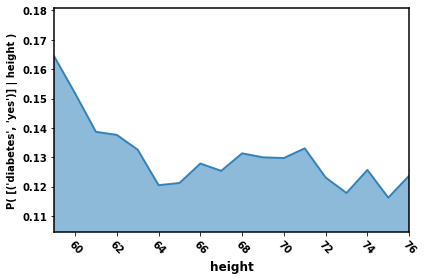

P(diabetes = yes) =                                0.12910348432894597
P(diabetes = yes | height) =                       0.12455367493623928
P(diabetes = yes | height) - P(diabetes = yes) =  -0.0045498093927066885


In [229]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['height'], gtype='pdf')

target = ('diabetes','yes')

dby = ps.P(target)

dby_height = ps.P(target, ['height'])

print("P(diabetes = yes) = {:>50}".format(dby))
print("P(diabetes = yes | height) = {:>41}".format(dby_height))
print("P(diabetes = yes | height) - P(diabetes = yes) = {:>23}".format(dby_height - dby))

### Observations : 

* As height increased, there seems to be a decrease in the probability of diabetes.

* The probability of diabetes is not affected by conditioning on Height.

## Diabetes vs BMI

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmi',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.001


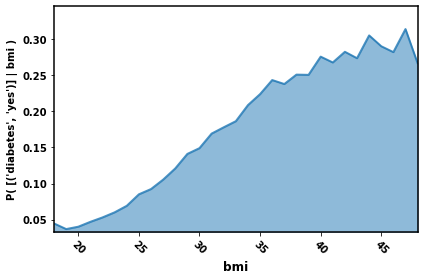

P(diabetes = yes) =                              0.12910348432894597
P(diabetes = yes | bmi) =                        0.10518800571156592
P(diabetes = yes | bmi) - P(diabetes = yes) =   -0.023915478617380054


In [232]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['bmi'], gtype='pdf')

target = ('diabetes','yes')

dby = ps.P(target)

dby_bmi = ps.P(target, ['bmi'])

print("P(diabetes = yes) = {:>48}".format(dby))
print("P(diabetes = yes | bmi) = {:>42}".format(dby_bmi))
print("P(diabetes = yes | bmi) - P(diabetes = yes) = {:>23}".format(dby_bmi - dby))

### Observations :

* Diabetes and BMI are positively correlated.

* As BMI increases, the probability of diabetes increases.

* Conditioned on BMI, the probability of diabetes decreased by 2.4%


## Diabetes vs Income

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('income',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


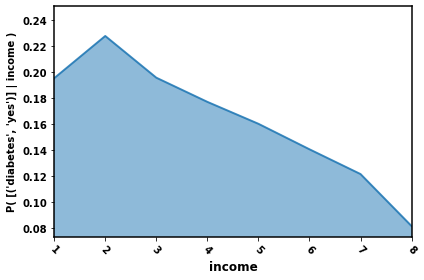

P(diabetes = yes) =                                0.12910348432894597
P(diabetes = yes | income) =                       0.1521842490633499
P(diabetes = yes | income) - P(diabetes = yes) =   0.02308076473440393


In [237]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['income'], gtype='pdf')

target = ('diabetes','yes')

dby = ps.P(target)

dby_income = ps.P(target, ['income'])

print("P(diabetes = yes) = {:>50}".format(dby))
print("P(diabetes = yes | income) = {:>40}".format(dby_income))
print("P(diabetes = yes | income) - P(diabetes = yes) = {:>21}".format(dby_income - dby))

### Observations :

* Diabetes and Income are negatively correlated.

* As income increases, the probability of diabetes increases.

* Conditioned on Income, the probability of diabetes decreased by 2.3%

## Diabetes vs Employment

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


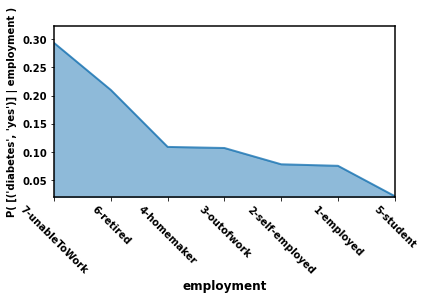

employment          1-employed              0.08      0.13         -0.05
employment          2-self-employed         0.08      0.13         -0.05
employment          3-outofwork             0.11      0.13  -0.020000000000000004
employment          4-homemaker             0.11      0.13  -0.020000000000000004
employment          5-student               0.02      0.13         -0.11
employment          6-retired               0.21      0.13  0.07999999999999999
employment          7-unableToWork          0.29      0.13  0.15999999999999998


In [265]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['employment'], gtype='pdf')

target = ('diabetes','yes')

dby = round( ps.P(target), 2)

for i in ps.getValues('employment'):
    dby_employment = round(ps.P(target, [('employment', i)]), 2)
    print('{:<18}  {:<18}  {:>8}  {:>8}  {:>12}'.format('employment', i, dby_employment, dby, dby_employment-dby))

### Observations :

* Students have lesser prone to diabetes, while the retired people and those who are unable to work are having higher chances of diabetes.

* People who are not able to work are having 16% higher chances of diabetes.

* Retired people have 8% higher chances of diabetes.

## Diabetes vs Physical Activity

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('physicalactivity',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


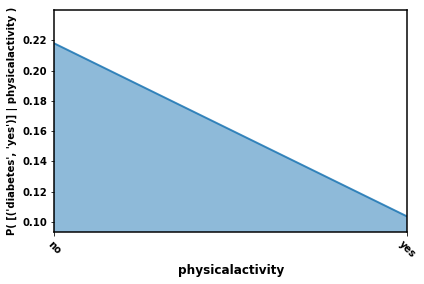

physicalactivity    no                      0.22      0.13          0.09
physicalactivity    yes                      0.1      0.13         -0.03


In [266]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['physicalactivity'], gtype='pdf')

target = ('diabetes','yes')

dby = round( ps.P(target), 2)

for i in ps.getValues('physicalactivity'):
    dby_physicalactivity = round(ps.P(target, [('physicalactivity', i)]), 2)
    print('{:<18}  {:<18}  {:>8}  {:>8}  {:>12}'.format('physicalactivity', i, dby_physicalactivity, dby, dby_physicalactivity-dby))

### Observations :

* 22% of the people who are not doing any physical activities are having diabetes which is 12% more than the people who are doing physical activities.

* Doing physical activity reduces the chance of diabetes by 3%. and not doing it increases it by 9%.

# Step 3: Effect of diabetes on variables 

In [320]:
print("var \t\t ps.E(var) \t\tps.E(var | db=yes) \t\tdiff \t\t ps.E(var|db=no) \t\t diff\n")

for i in ['age', 'height', 'weight', 'bmi', 'income']:
    e_i = round(ps.E(i), 2)
    e_i_dby =  round(ps.E(i, [('diabetes', 'yes')]), 2)
    e_i_dbn =  round(ps.E(i, [('diabetes', 'no')]), 2)
    print('{:<18} {:<24} {:<24} {:<10} {:20} {:24}'.format(i, e_i, e_i_dby, round(e_i - e_i_dby, 2), e_i_dbn, round(e_i - e_i_dbn, 2)))

for i in ['employment', 'physicalactivity']:
    e_i = ps.E(i)
    e_i_dby =  ps.E(i, [('diabetes', 'yes')])
    e_i_dbn =  ps.E(i, [('diabetes', 'no')])
    print('{:<18} {:<24} {:50} {:<10}'.format(i, e_i, e_i_dby, e_i_dbn))

var 		 ps.E(var) 		ps.E(var | db=yes) 		diff 		 ps.E(var|db=no) 		 diff

age                54.14                    63.91                    -9.77                      52.7                     1.44
height             67.18                    67.03                    0.15                       67.2                    -0.02
weight             183.07                   203.11                   -20.04                    180.1                     2.97
bmi                28.4                     31.7                     -3.3                      27.91                     0.49
income             6.12                     5.43                     0.69                       6.22                     -0.1
employment         1-employed               6-retired                                          1-employed
physicalactivity   yes                      yes                                                yes       


### Observations :

* Expected Age of the people with diabetes is 64 and for those without diabetes, it is 53.

* The height difference between the people with diabetes and without diabetes is not significant. (0.17 inches)

* People with diabetes weigh 23 pounds more than those without diabetes.

* People with diabetes have higher BMI of 3.8 more than the people without diabetes.

* The difference between the average income of all people and that of average income of people with diabetes is quite significant.(0.7)

* The expected income of people without diabetes is above 50000 per annum.

* Most of the people with the diabetes are retired people, while employees cover most of surveyed people, it is that category of people where diabetes is not expected much.

* Physical activity seems like a biased data. Around 80% of surveyed people said they are doing some type of physical activity.

# Step 4: Pairwise effect on diabetes

In [382]:
table = []

list1 = ['age', 'height', 'weight', 'bmi']
list2 = ['income', 'employment', 'physicalactivity']
list3 = list1+list2

for i in range(len(list1)):
    for j in range(i, len(list3)):
        if list3[j] in list2:
            for k in ps.getValues(list3[j]):
                u = round(ps.P(target, [list1[i]]), 2)
                v = round(ps.P(target, [(list3[j], k)]), 2)
                w = round(ps.P(target, [list1[i],(list3[j], k)]), 2)

                table.append([list1[i], list3[j], k, u, v, w, dby, round(u-dby, 2), round(w-dby, 2), round(w-u, 2)])

        elif list1[i] != list3[j]:
            u = round(ps.P(target, [list1[i]]), 2)
            v = round(ps.P(target, [list3[j]]), 2)
            w = round(ps.P(target, [list1[i],list3[j]]), 2)
            table.append([list1[i], list3[j], " ", u, v, w, dby, round(u-dby, 2), round(w-dby, 2), round(w-u, 2)])

for i in list2:
    for j in ps.getValues(i):
        for k in list2:
            if k != i:
                for l in ps.getValues(k):
                    u = round(ps.P(target, [(i,j)]), 2)
                    v = round(ps.P(target, [(k, l)]), 2)
                    w = round(ps.P(target, [(i,j) ,(k, l)]), 2)
                    table.append([str(i)+str(j), k, l, u, v, w, dby, round(u-dby, 2), round(w-dby, 2), round(w-u, 2)])

df = pd.DataFrame(table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)'])
df.shape #Master table with All pairwise combinations of variables and their conditional probabilities with respect to diabetes

(246, 10)

In [388]:
df.head(10)

,var1,var2,var2Val,P(db=yes|var1),P(db=yes|var2),"P(db=yes|var1,var2)",P(db=yes),diff:db(var1)-dby,"diff:db(var1,var2) - dby","diff:db(var1,var2)-db(var1)"
0,age,height,,0.1,0.12,0.08,0.13,-0.03,-0.05,-0.02
1,age,weight,,0.1,0.15,0.12,0.13,-0.03,-0.01,0.02
2,age,bmi,,0.1,0.11,0.09,0.13,-0.03,-0.04,-0.01
3,age,income,1,0.1,0.20,0.18,0.13,-0.03,0.05,0.08
4,age,income,2,0.1,0.23,0.17,0.13,-0.03,0.04,0.07
5,age,income,3,0.1,0.20,0.17,0.13,-0.03,0.04,0.07
6,age,income,4,0.1,0.18,0.14,0.13,-0.03,0.01,0.04
7,age,income,5,0.1,0.16,0.16,0.13,-0.03,0.03,0.06
8,age,income,6,0.1,0.14,0.11,0.13,-0.03,-0.02,0.01
9,age,income,7,0.1,0.12,0.08,0.13,-0.03,-0.05,-0.02


## Diabetes vs Age, X
X - height, weight, BMI, income, employment, physical activity

In [387]:
age_table = []

for i in ['height', 'weight', 'bmi', 'income', 'employment', 'physicalactivity']:
    u = round(ps.P(target, ['age']), 2) #var1 
    if i in ['income', 'employment', 'physicalactivity']:
        for j in ps.getValues(i):
            v = round(ps.P(target, [(i, j)]), 2) #var2
            w = round(ps.P(target, ['age', (i, j)]), 2) #var1, var2
            age_table.append(['age', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])
    else:
        v = round(ps.P(target, [i]), 2) #var2
        w = round(ps.P(target, ['age', i]), 2) #var1, var2
        age_table.append(['age', i, '-', u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_age = pd.DataFrame(age_table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var2)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_age

,var1,var2,var2Val,P(db=yes|var1),P(db=yes|var2),"P(db=yes|var1,var2)",P(db=yes),diff:db(var1)-dby,diff:db(var2)-dby,"diff:db(var1,var2) - dby","diff:db(var1,var2)-db(var1)","diff:db(var1,var2)-db(var2)"
0,age,height,-,0.1,0.12,0.08,0.13,-0.03,-0.01,-0.05,-0.02,-0.04
1,age,weight,-,0.1,0.15,0.12,0.13,-0.03,0.02,-0.01,0.02,-0.03
2,age,bmi,-,0.1,0.11,0.09,0.13,-0.03,-0.02,-0.04,-0.01,-0.02
3,age,income,1,0.1,0.20,0.18,0.13,-0.03,0.07,0.05,0.08,-0.02
4,age,income,2,0.1,0.23,0.17,0.13,-0.03,0.10,0.04,0.07,-0.06
5,age,income,3,0.1,0.20,0.17,0.13,-0.03,0.07,0.04,0.07,-0.03
6,age,income,4,0.1,0.18,0.14,0.13,-0.03,0.05,0.01,0.04,-0.04
7,age,income,5,0.1,0.16,0.16,0.13,-0.03,0.03,0.03,0.06,0.00
8,age,income,6,0.1,0.14,0.11,0.13,-0.03,0.01,-0.02,0.01,-0.03
9,age,income,7,0.1,0.12,0.08,0.13,-0.03,-0.01,-0.05,-0.02,-0.04


### Observations :

* 

## Diabetes | Height, X

In [389]:
height_table = []

for i in ['age', 'weight', 'bmi', 'income', 'employment', 'physicalactivity']:
    u = round(ps.P(target, ['height']), 2) #var1 
    if i in ['income', 'employment', 'physicalactivity']:
        for j in ps.getValues(i):
            v = round(ps.P(target, [(i, j)]), 2) #var2
            w = round(ps.P(target, ['height', (i, j)]), 2) #var1, var2
            height_table.append(['height', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])
    else:
        v = round(ps.P(target, [i]), 2) #var2
        w = round(ps.P(target, ['height', i]), 2) #var1, var2
        height_table.append(['height', i, '-', u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_height = pd.DataFrame(height_table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var2)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_height

,var1,var2,var2Val,P(db=yes|var1),P(db=yes|var2),"P(db=yes|var1,var2)",P(db=yes),diff:db(var1)-dby,diff:db(var2)-dby,"diff:db(var1,var2) - dby","diff:db(var1,var2)-db(var1)","diff:db(var1,var2)-db(var2)"
0,height,age,-,0.12,0.10,0.08,0.13,-0.01,-0.03,-0.05,-0.04,-0.02
1,height,weight,-,0.12,0.15,0.11,0.13,-0.01,0.02,-0.02,-0.01,-0.04
2,height,bmi,-,0.12,0.11,0.09,0.13,-0.01,-0.02,-0.04,-0.03,-0.02
3,height,income,1,0.12,0.20,0.18,0.13,-0.01,0.07,0.05,0.06,-0.02
4,height,income,2,0.12,0.23,0.20,0.13,-0.01,0.10,0.07,0.08,-0.03
5,height,income,3,0.12,0.20,0.20,0.13,-0.01,0.07,0.07,0.08,0.00
6,height,income,4,0.12,0.18,0.18,0.13,-0.01,0.05,0.05,0.06,0.00
7,height,income,5,0.12,0.16,0.15,0.13,-0.01,0.03,0.02,0.03,-0.01
8,height,income,6,0.12,0.14,0.13,0.13,-0.01,0.01,0.00,0.01,-0.01
9,height,income,7,0.12,0.12,0.13,0.13,-0.01,-0.01,0.00,0.01,0.01


## Diabetes | Weight, X

In [390]:
weight_table = []

for i in ['age', 'height', 'bmi', 'income', 'employment', 'physicalactivity']:
    u = round(ps.P(target, ['weight']), 2) #var1 
    if i in ['income', 'employment', 'physicalactivity']:
        for j in ps.getValues(i):
            v = round(ps.P(target, [(i, j)]), 2) #var2
            w = round(ps.P(target, ['weight', (i, j)]), 2) #var1, var2
            weight_table.append(['weight', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])
    else:
        v = round(ps.P(target, [i]), 2) #var2
        w = round(ps.P(target, ['weight', i]), 2) #var1, var2
        weight_table.append(['weight', i, '-', u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_weight = pd.DataFrame(weight_table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var2)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_weight

,var1,var2,var2Val,P(db=yes|var1),P(db=yes|var2),"P(db=yes|var1,var2)",P(db=yes),diff:db(var1)-dby,diff:db(var2)-dby,"diff:db(var1,var2) - dby","diff:db(var1,var2)-db(var1)","diff:db(var1,var2)-db(var2)"
0,weight,age,-,0.15,0.10,0.12,0.13,0.02,-0.03,-0.01,-0.03,0.02
1,weight,height,-,0.15,0.12,0.11,0.13,0.02,-0.01,-0.02,-0.04,-0.01
2,weight,bmi,-,0.15,0.11,0.09,0.13,0.02,-0.02,-0.04,-0.06,-0.02
3,weight,income,1,0.15,0.20,0.23,0.13,0.02,0.07,0.10,0.08,0.03
4,weight,income,2,0.15,0.23,0.26,0.13,0.02,0.10,0.13,0.11,0.03
5,weight,income,3,0.15,0.20,0.23,0.13,0.02,0.07,0.10,0.08,0.03
6,weight,income,4,0.15,0.18,0.22,0.13,0.02,0.05,0.09,0.07,0.04
7,weight,income,5,0.15,0.16,0.19,0.13,0.02,0.03,0.06,0.04,0.03
8,weight,income,6,0.15,0.14,0.18,0.13,0.02,0.01,0.05,0.03,0.04
9,weight,income,7,0.15,0.12,0.14,0.13,0.02,-0.01,0.01,-0.01,0.02


## Diabetes| BMI, X

In [391]:
bmi_table = []

for i in ['age', 'height', 'weight', 'income', 'employment', 'physicalactivity']:
    u = round(ps.P(target, ['bmi']), 2) #var1 
    if i in ['income', 'employment', 'physicalactivity']:
        for j in ps.getValues(i):
            v = round(ps.P(target, [(i, j)]), 2) #var2
            w = round(ps.P(target, ['bmi', (i, j)]), 2) #var1, var2
            bmi_table.append(['bmi', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])
    else:
        v = round(ps.P(target, [i]), 2) #var2
        w = round(ps.P(target, ['bmi', i]), 2) #var1, var2
        bmi_table.append(['bmi', i, '-', u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_bmi = pd.DataFrame(bmi_table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var2)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_bmi

,var1,var2,var2Val,P(db=yes|var1),P(db=yes|var2),"P(db=yes|var1,var2)",P(db=yes),diff:db(var1)-dby,diff:db(var2)-dby,"diff:db(var1,var2) - dby","diff:db(var1,var2)-db(var1)","diff:db(var1,var2)-db(var2)"
0,bmi,age,-,0.11,0.10,0.09,0.13,-0.02,-0.03,-0.04,-0.02,-0.01
1,bmi,height,-,0.11,0.12,0.09,0.13,-0.02,-0.01,-0.04,-0.02,-0.03
2,bmi,weight,-,0.11,0.15,0.09,0.13,-0.02,0.02,-0.04,-0.02,-0.06
3,bmi,income,1,0.11,0.20,0.15,0.13,-0.02,0.07,0.02,0.04,-0.05
4,bmi,income,2,0.11,0.23,0.21,0.13,-0.02,0.10,0.08,0.10,-0.02
5,bmi,income,3,0.11,0.20,0.18,0.13,-0.02,0.07,0.05,0.07,-0.02
6,bmi,income,4,0.11,0.18,0.14,0.13,-0.02,0.05,0.01,0.03,-0.04
7,bmi,income,5,0.11,0.16,0.13,0.13,-0.02,0.03,0.00,0.02,-0.03
8,bmi,income,6,0.11,0.14,0.11,0.13,-0.02,0.01,-0.02,0.00,-0.03
9,bmi,income,7,0.11,0.12,0.10,0.13,-0.02,-0.01,-0.03,-0.01,-0.02


## Diabetes | Income, X

In [392]:
income_table = []

for i in ['age', 'height', 'weight', 'bmi', 'employment', 'physicalactivity']:
    u = round(ps.P(target, ['income']), 2) #var1 
    if i in ['employment', 'physicalactivity']:
        for j in ps.getValues(i):
            v = round(ps.P(target, [(i, j)]), 2) #var2
            w = round(ps.P(target, ['income', (i, j)]), 2) #var1, var2
            income_table.append(['income', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])
    else:
        v = round(ps.P(target, [i]), 2) #var2
        w = round(ps.P(target, ['income', i]), 2) #var1, var2
        income_table.append(['income', i, '-', u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_income = pd.DataFrame(income_table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var2)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_income

,var1,var2,var2Val,P(db=yes|var1),P(db=yes|var2),"P(db=yes|var1,var2)",P(db=yes),diff:db(var1)-dby,diff:db(var2)-dby,"diff:db(var1,var2) - dby","diff:db(var1,var2)-db(var1)","diff:db(var1,var2)-db(var2)"
0,income,age,-,0.15,0.10,0.13,0.13,0.02,-0.03,0.00,-0.02,0.03
1,income,height,-,0.15,0.12,0.15,0.13,0.02,-0.01,0.02,0.00,0.03
2,income,weight,-,0.15,0.15,0.18,0.13,0.02,0.02,0.05,0.03,0.03
3,income,bmi,-,0.15,0.11,0.13,0.13,0.02,-0.02,0.00,-0.02,0.02
4,income,employment,1-employed,0.15,0.08,0.09,0.13,0.02,-0.05,-0.04,-0.06,0.01
5,income,employment,2-self-employed,0.15,0.08,0.09,0.13,0.02,-0.05,-0.04,-0.06,0.01
6,income,employment,3-outofwork,0.15,0.11,0.10,0.13,0.02,-0.02,-0.03,-0.05,-0.01
7,income,employment,4-homemaker,0.15,0.11,0.13,0.13,0.02,-0.02,0.00,-0.02,0.02
8,income,employment,5-student,0.15,0.02,0.02,0.13,0.02,-0.11,-0.11,-0.13,0.00
9,income,employment,6-retired,0.15,0.21,0.23,0.13,0.02,0.08,0.10,0.08,0.02


Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('employment',), ('age',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
enhance =  False
nTests =  217
Test Time =  164.032
String Value Mappings:
     employment: 1-employed=1, 2-self-employed=2, 3-outofwork=3, 4-homemaker=4, 5-student=5, 6-retired=6, 7-unableToWork=7



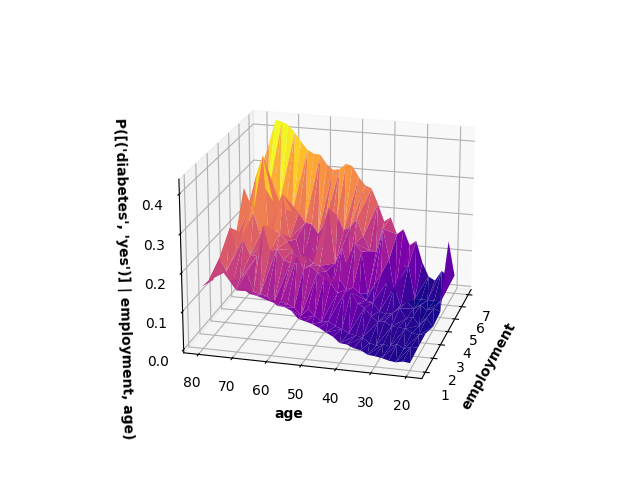

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 0.8333333134651184, 'type': 'set_device_pixel_ratio'}


In [4]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=[('employment'), ('age')], gtype='pdf')

# Step 5: Intermediate effects